In [90]:
import torch
import matplotlib.pyplot as plt
from os import environ
import numpy as np
from src.utilities import get_gd_directory


def plot_result(dataset, arch_id, loss, width, bias, init_bias, init_weight, batch_norm, lr_list, st=0, freq=10, scale="log", factor=10., starting=0, seed=0):
    lr_list = np.array(lr_list)
    lr_list = lr_list[st:st+5]
    lr_num = lr_list.shape[0]
    plt.figure(figsize=(15, 15), dpi=100)
    title = f"{dataset}/{arch_id}_BN/seed_{seed}/{loss}/gd/{init_weight}_lr_{lr_list}" if batch_norm else f"{dataset}/{arch_id}/seed_0/{loss}/gd/{init_weight}_lr_{lr_list}"
    plt.suptitle(title)
    print(lr_num)
    for i, lr in enumerate(lr_list):
    # for i, lr in enumerate(np.arange(0.1, 0.2, 0.02)):
        # gd_lr = 0.01
        gd_lr = lr
        gd_eig_freq = freq if isinstance(freq, int) else freq[i]

        # gd_directory = f"./results/{dataset}/{arch}/seed_0/{loss}/gd/lr_{gd_lr}"
        gd_directory = get_gd_directory(dataset, lr, arch_id, seed, "gd", loss, 0.0, width=width, bias=bias, init_bias=init_bias, init_weight=init_weight, batch_norm=batch_norm)

        gd_train_loss = torch.load(f"{gd_directory}/train_loss_final")[starting:]
        gd_train_acc = torch.load(f"{gd_directory}/train_acc_final")[starting:]
        gd_test_loss = torch.load(f"{gd_directory}/test_loss_final")[starting:]
        gd_test_acc = torch.load(f"{gd_directory}/test_acc_final")[starting:]
        gd_sharpness = torch.load(f"{gd_directory}/eigs_final")[:,0][starting:]
        gd_w1 = torch.load(f"{gd_directory}/w1_final")[starting:]
        gd_w2 = torch.load(f"{gd_directory}/w2_final")[starting:]

        # gd_steps = range(0, gd_sharpness.size(dim=0)*gd_eig_freq, gd_eig_freq)

        plt.subplot(4, lr_num, lr_num*0+i+1)
        # plt.xlim(1, 20000)
        plt.plot(gd_train_loss, label='training loss')
        plt.plot(gd_test_loss, label='test loss')
        # plt.xscale('log')
        plt.yscale(scale)
        # plt.plot(gd_steps, gd_sharpness/factor)
        plt.title("loss")
        plt.legend()

        plt.subplot(4, lr_num, lr_num*1+i+1)
        # plt.xlim(1, 20000)
        # plt.xscale('log')
        plt.plot(gd_train_acc, label='training acc')
        plt.plot(gd_test_acc, label='test acc')
        plt.title("accuracy")
        plt.legend()

        plt.subplot(4, lr_num, lr_num*2+i+1)
        # plt.xlim(1, 20000)
        # plt.xscale('log')

        # lin_coef = np.polyfit(gd_steps, gd_sharpness, 1)
        # lin_pred = np.poly1d(lin_coef)
        # plt.plot(gd_steps, lin_pred(gd_steps), '--')
        # plt.scatter(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness, s=1)
        plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness)
        plt.axhline(2. / gd_lr, linestyle='dotted')
        plt.yscale(scale)
        plt.title("sharpness")

        ax4 = plt.subplot(4, lr_num, lr_num*3+i+1)
        # ax4.set_xlim(1, 20000)
        # ax4.set_xscale('log')
        ax4.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, (gd_w1 - gd_w2 )**2, label="(w1-w2)^2")
        ax4.legend()

        # plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_w1 , label="w1")
        # plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_w2 , label="w2")

        # ax5 = ax4.twinx()
        # input_dim = 28*28 if dataset == 'mnist' else 32*32*3
        print(gd_sharpness[0], gd_w1[0], gd_w2[0])
        # ax5.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, (gd_w1 / np.sqrt(input_dim) - gd_w2 / np.sqrt(10))**2, label="(w1-w2)^2 (normalized)", color='r')
        # ax5.legend()
        
        # plt.yscale(scale)
        plt.title("weight")

        plt.xlabel("iteration")
    title = title.replace('/', '_')
    plt.savefig(f'results/0919/{title}.png')

5
tensor(11190.5117) tensor(6.0000) tensor(20.)
tensor(11190.5117) tensor(6.0000) tensor(20.)
tensor(11190.5117) tensor(6.0000) tensor(20.)
tensor(11190.5117) tensor(6.0000) tensor(20.)
tensor(11190.5117) tensor(6.0000) tensor(20.)
5
tensor(29896.1035) tensor(6.0000) tensor(20.)
tensor(29896.1035) tensor(6.0000) tensor(20.)
tensor(29896.1035) tensor(6.0000) tensor(20.)
tensor(29896.1035) tensor(6.0000) tensor(20.)
tensor(29896.1035) tensor(6.0000) tensor(20.)
5
tensor(10800.8809) tensor(6.0000) tensor(20.)
tensor(10800.8809) tensor(6.0000) tensor(20.)
tensor(10800.8809) tensor(6.0000) tensor(20.)
tensor(10800.8809) tensor(6.0000) tensor(20.)
tensor(10800.8809) tensor(6.0000) tensor(20.)


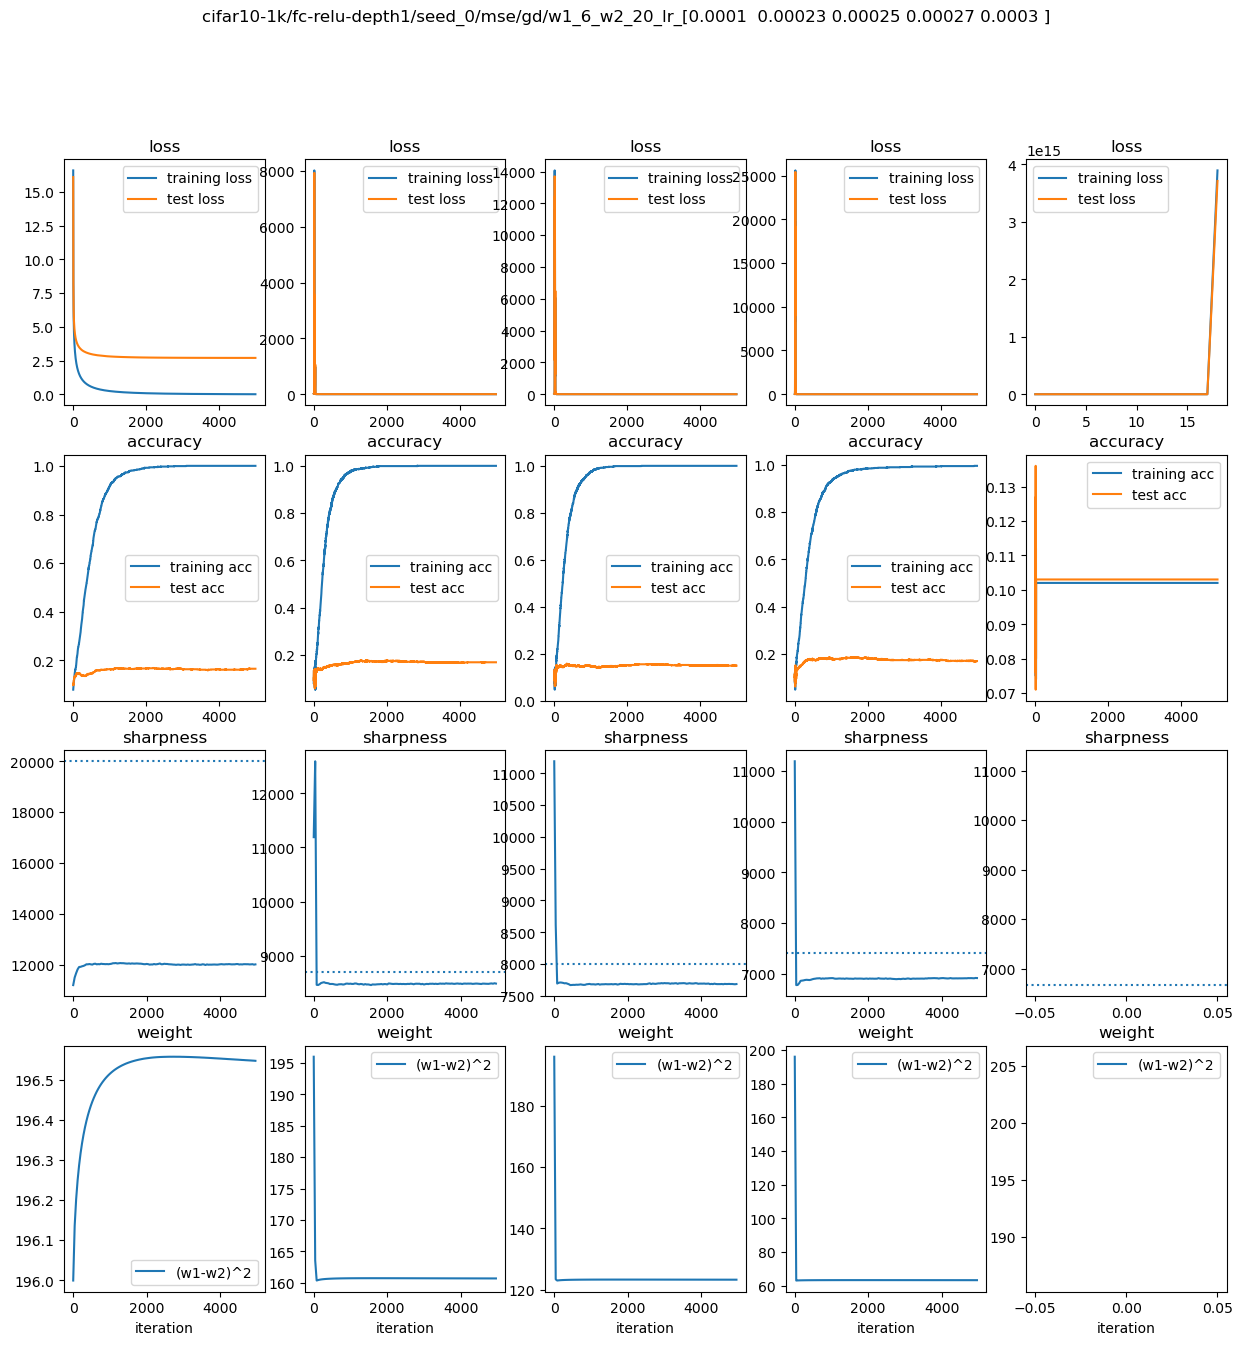

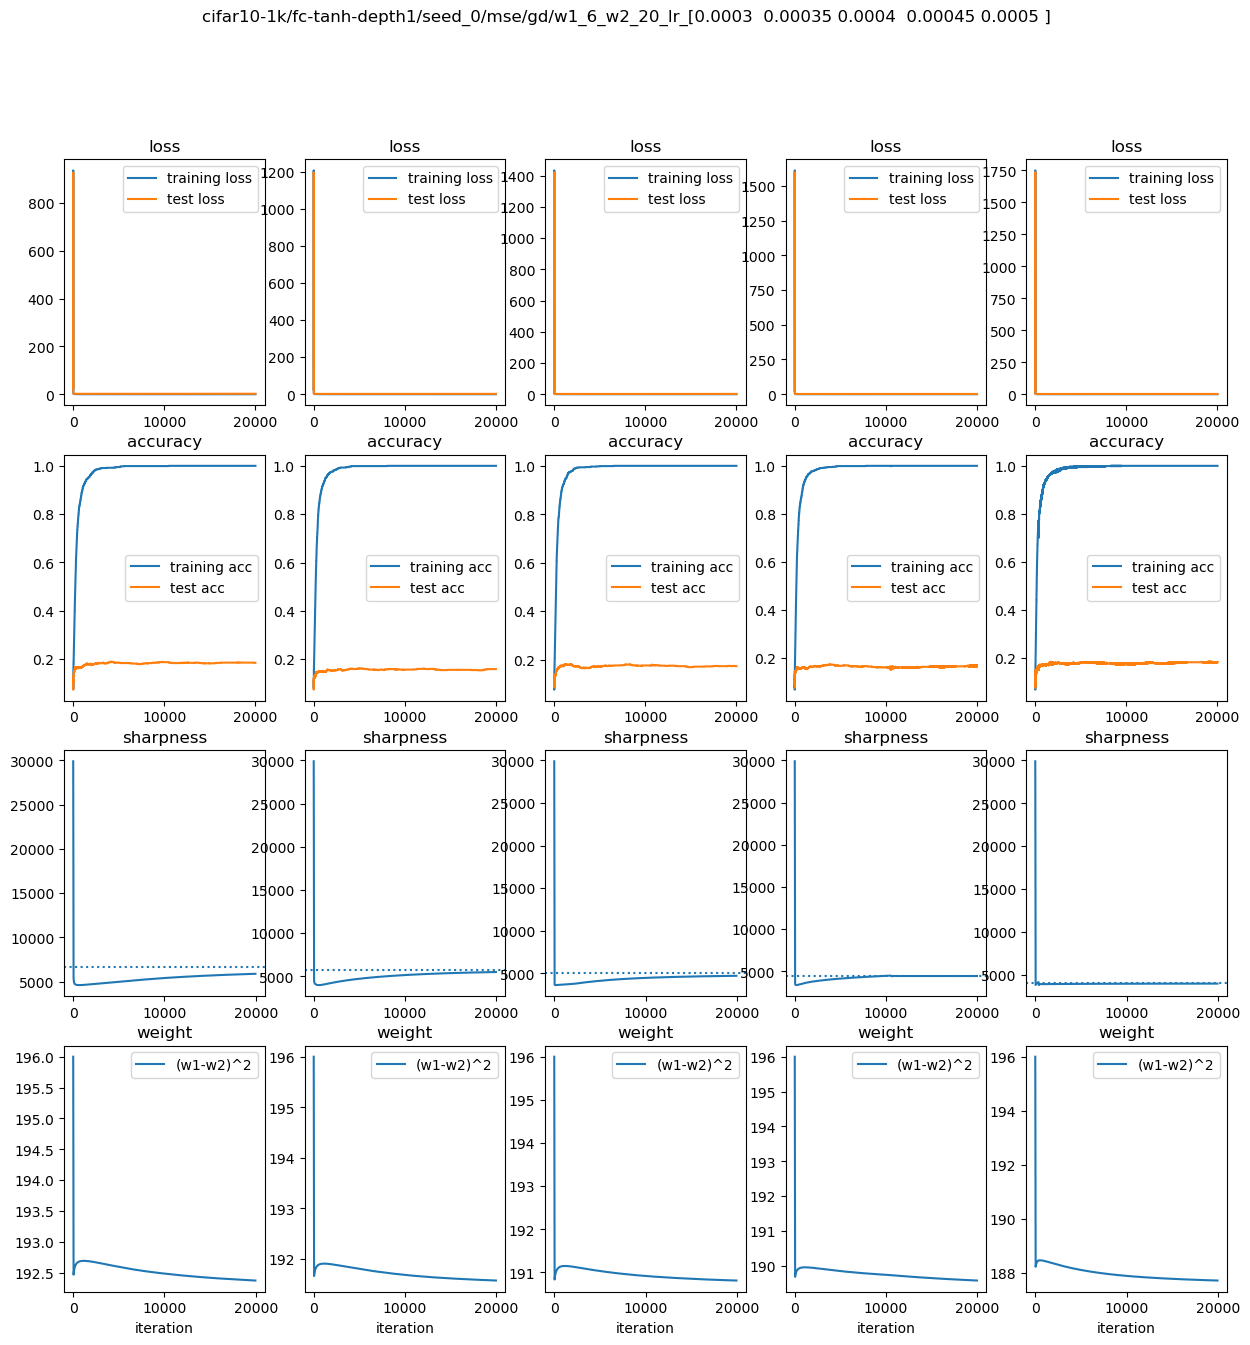

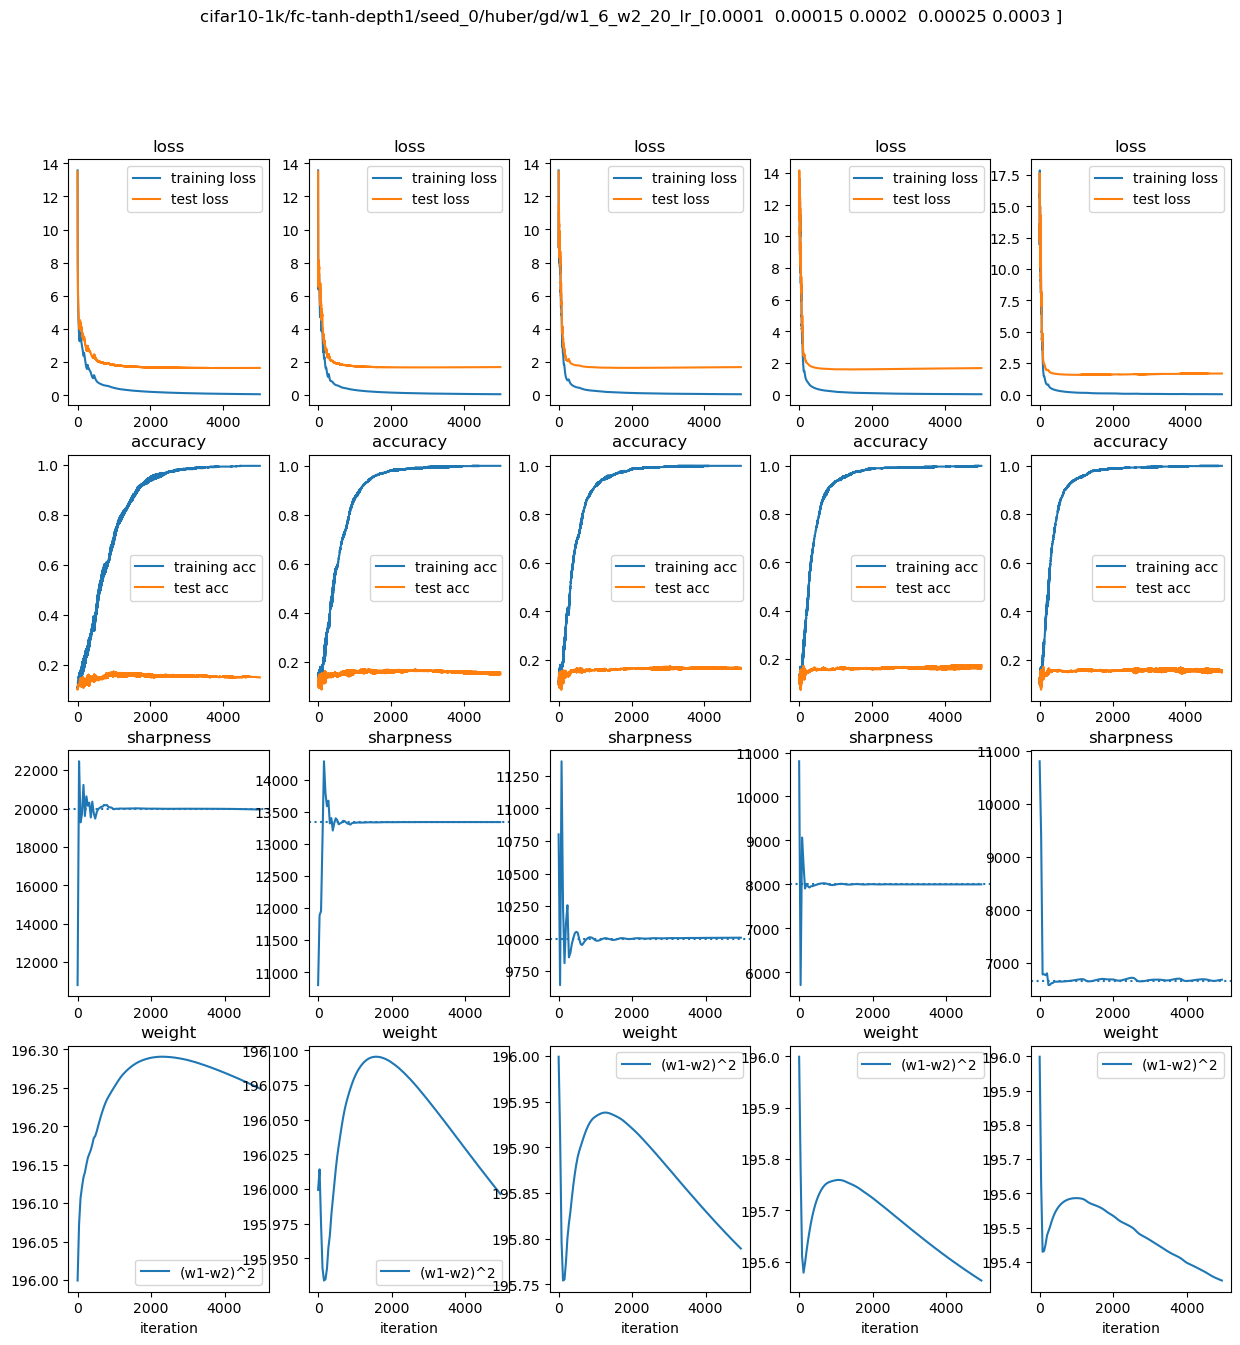

In [178]:
dataset = "cifar10-1k"
arch_list = ["fc-relu-depth1", "fc-tanh-depth1"]
# arch_list = ["fc-relu-depth1"]
arch_list = ["fc-relu-depth1"]
loss = "mse"
# lr_list = np.array([0.0001, 0.0002, 0.0004, 0.001, 0.002])
lr_list = np.array([0.0008])
# lr_list = np.array([0.01, 0.02, 0.04, 0.1, 0.2])
st = 0
# freq = [40] * 2 + [20] * 3
# freq = [40] * 4 + [400]
freq = [40] * 5
width = 200
bias = False
init_bias = "b_init"
init_weight = "w1_1_w2_1"
batch_norm = True

lr_list_mse_relu = {
    "w1_1_w2_1": [0.07, 0.08, 0.09], 
    "w1_1_w2_2": [0.02, 0.025, 0.03], 
    "w1_1_w2_5": [0.003, 0.0035, 0.004], 
    "w1_1_w2_10": [0.0013],

    "w1_5_w2_20": [0.0001, 0.00015, 0.0002, 0.00022, 0.00025, 0.00028],
    "w1_6_w2_20": [0.0001, 0.00023, 0.00025, 0.00027, 0.0003],
    # "w1_6_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],
    "w1_3_w2_20": [0.0001, 0.00015, 0.0002, 0.00021, 0.00022, 0.00023, 0.00025], 

    "w1_4_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003], 
    }
lr_list_mse_tanh = {
    "w1_1_w2_1": [], 
    "w1_1_w2_2": [], 
    "w1_1_w2_5": [], 
    "w1_1_w2_10": [0.0009], 
    # "w1_1_w2_1": [0.01, 0.03, 0.05], 
    # "w1_1_w2_2": [0.01, 0.015, 0.02], 
    # "w1_1_w2_5": [0.01, 0.015, 0.02], 
    # "w1_1_w2_10": [0.01, 0.015, 0.02]

    "w1_5_w2_20": [0.0001, 0.0003, 0.0005, 0.0007, 0.0009],
    "w1_6_w2_20": [0.0003, 0.00035, 0.0004, 0.00045, 0.0005],

    "w1_3_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003], 
    "w1_4_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003], 
}

lr_list_huber_relu = {
    # "w1_1_w2_1": [0.08, 0.1, 0.11], 
    # "w1_1_w2_1": [0.07, 0.09], 
    "w1_1_w2_1": [], 
    "w1_1_w2_2": [], 
    "w1_1_w2_5": [], 
    "w1_1_w2_10": [0.001], 
    # "w1_1_w2_2": [0.02, 0.03, 0.04], 
    # "w1_1_w2_5": [0.02, 0.03, 0.04], 
    # "w1_1_w2_10": [0.02, 0.03, 0.04] 
    "w1_6_w2_20": [0.0001, 0.0003, 0.0005, 0.0007, 0.0009],
    "w1_5_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    "w1_3_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005], 
    "w1_4_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005], 
    }
lr_list_huber_tanh = {
    # "w1_1_w2_1": [0.01, 0.03, 0.05], 
    # "w1_1_w2_2": [0.01, 0.015, 0.02], 
    # "w1_1_w2_5": [0.01, 0.015, 0.02], 
    # "w1_1_w2_10": [0.01, 0.015, 0.02]
    "w1_1_w2_1": [], 
    "w1_1_w2_2": [], 
    "w1_1_w2_5": [], 
    "w1_1_w2_10": [0.0004, 0.0006, 0.0007, 0.0009, 0.001, 0.0011, 0.0012, 0.0013], 

    "w1_6_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],
    "w1_5_w2_20": [0.0001, 0.0003, 0.0005, 0.0007, 0.0009],
    "w1_3_w2_20": [5e-5, 0.0001, 0.00015, 0.0002, 0.00025],
    "w1_4_w2_20": [5e-5, 0.0001, 0.00015, 0.0002, 0.00025],

}

lr_list_mse_relu_BN = {
    "w1_1_w2_1": [0.02, 0.03, 0.04], 
    "w1_1_w2_2": [0.02, 0.03, 0.04], 
    "w1_1_w2_5": [0.02, 0.03, 0.04], 
    "w1_1_w2_10": [0.02, 0.03, 0.04],

    "w1_5_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    "w1_6_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],
    # "w1_6_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    "w1_3_w2_20": [5e-5, 0.0001, 0.00015, 0.0002, 0.00025],
    "w1_4_w2_20": [5e-5, 0.0001, 0.00015, 0.0002, 0.00025],
    }

lr_list_mse_cubicrelu = {
    "w1_1_w2_1": [0.01, 0.015, 0.02], 
    "w1_1_w2_2": [0.01, 0.015, 0.02], 
    "w1_1_w2_5": [0.005, 0.08, 0.01], 
    "w1_1_w2_10": [0.0002, 0.005, 0.008], 
    "w1_10_w2_1": [0.002, 0.0025, 0.003, 0.0035, 0.0036], 
    "w1_10_w2_2": [0.0004, 0.0005, 0.0006, 0.0007, 0.0008] ,


    "w1_2_w2_20": [0.003, 0.0035, 0.004],
    "w1_5_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],


    "w1_3_w2_20": [0.0001, 0.0005, 0.0009, 0.0013, 0.0017],
    "w1_4_w2_20": [0.0001, 0.0005, 0.0009, 0.0013, 0.0017],
    
    "w1_6_w2_20": [0.00002, 0.00006, 0.0001, 0.00014, 0.00018],
    "w1_8_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    "w1_10_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    }

lr_list_huber_cubicrelu = {
    "w1_3_w2_20": [0.0001, 0.0005, 0.0009, 0.0013, 0.0017],
    "w1_4_w2_20": [0.0001, 0.0005, 0.0009, 0.0013, 0.0017],
    "w1_5_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],
    # "w1_6_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],
    "w1_6_w2_20": [0.0001, 0.0003, 0.0005, 0.0007, 0.0009],
    "w1_10_w2_2": [0.0015, 0.002, 0.0023], 
    "w1_20_w2_5": [0.0001, 0.0005],
    "w1_40_w2_20": [0.00001, 0.00005],
    }

lr_list_mse_cubicrelu_double = {
    "w1_3_w2_15": [0.00005, 0.0001, 0.00015, 0.0002],
    "w1_6_w2_15": [0.000005, 0.00001, 0.000015, 0.00002],
    }
lr_list_huber_cubicrelu_double = {
    "w1_3_w2_15": [0.0001, 0.0002, 0.0003, 0.0004],
    "w1_6_w2_15": [0.00003, 0.00006, 0.00009, 0.00012, 0.00015],
    }

# for weight in ["w1_10_w2_1", "w1_20_w2_1", "w1_20_w2_2", "w1_20_w2_3"]:
st = 0
for weight in ["w1_6_w2_20"]:
    plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, False, lr_list_mse_relu[weight], st, freq, "linear", starting=0)
    plot_result(dataset, 'fc-tanh-depth1', 'mse', width, bias, init_bias, weight, False, lr_list_mse_tanh[weight], st, freq, "linear", starting=0)
#     plot_result(dataset, 'fc-relu-depth1', 'huber', width, bias, init_bias, weight, False, lr_list_huber_relu[weight], st, freq, "linear", starting=0)
    plot_result(dataset, 'fc-tanh-depth1', 'huber', width, bias, init_bias, weight, False, lr_list_huber_tanh[weight], st, freq, "linear", starting=0)
#     plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, True, lr_list_mse_relu_BN[weight], st, freq, "linear", starting=0)
#     plot_result(dataset, 'fc-cubic_relu-depth1', 'mse', width, bias, init_bias, weight, False, lr_list_mse_cubicrelu[weight], st, freq, "linear", seed=0)
#     plot_result(dataset, 'fc-cubic_relu-depth1', 'huber', width, bias, init_bias, weight, False, lr_list_huber_cubicrelu[weight], st, freq, "linear", starting=0, seed=0)

# for weight in ["w1_6_w2_15"]:
#     plot_result(dataset, 'fc-cubic_relu-double', 'mse', width, bias, init_bias, weight, False, lr_list_mse_cubicrelu_double[weight], st, [400]*5, "linear", starting=0, seed=0)
#     plot_result(dataset, 'fc-cubic_relu-double', 'huber', width, bias, init_bias, weight, False, lr_list_huber_cubicrelu_double[weight], st, [400]*5, "linear", starting=0, seed=0)


# for arch_id in arch_list:
    # plot_result(dataset, arch_id, loss, width, bias, init_bias, init_weight, batch_norm, lr_list, st, freq, "log", starting=0)

## MNIST

3
tensor(19.8763) tensor(207.5756) tensor(188.2748)
tensor(4.2474) tensor(16398.3203) tensor(11286.5576)
tensor(2.2475) tensor(331881.4688) tensor(151759.4531)
3
tensor(212.8122) tensor(15.5802) tensor(18.2618)
tensor(191.5387) tensor(36726792.) tensor(1.7279e+17)
tensor(nan) tensor(nan) tensor(nan)
3
tensor(60.7435) tensor(10.1191) tensor(19.9166)
tensor(49.6925) tensor(10.6669) tensor(19.7664)
tensor(31.4717) tensor(11.6222) tensor(19.6006)
3
tensor(211.8535) tensor(10.3932) tensor(19.7236)
tensor(37.2866) tensor(10.7739) tensor(19.5279)
tensor(73.2824) tensor(10.9757) tensor(19.2241)


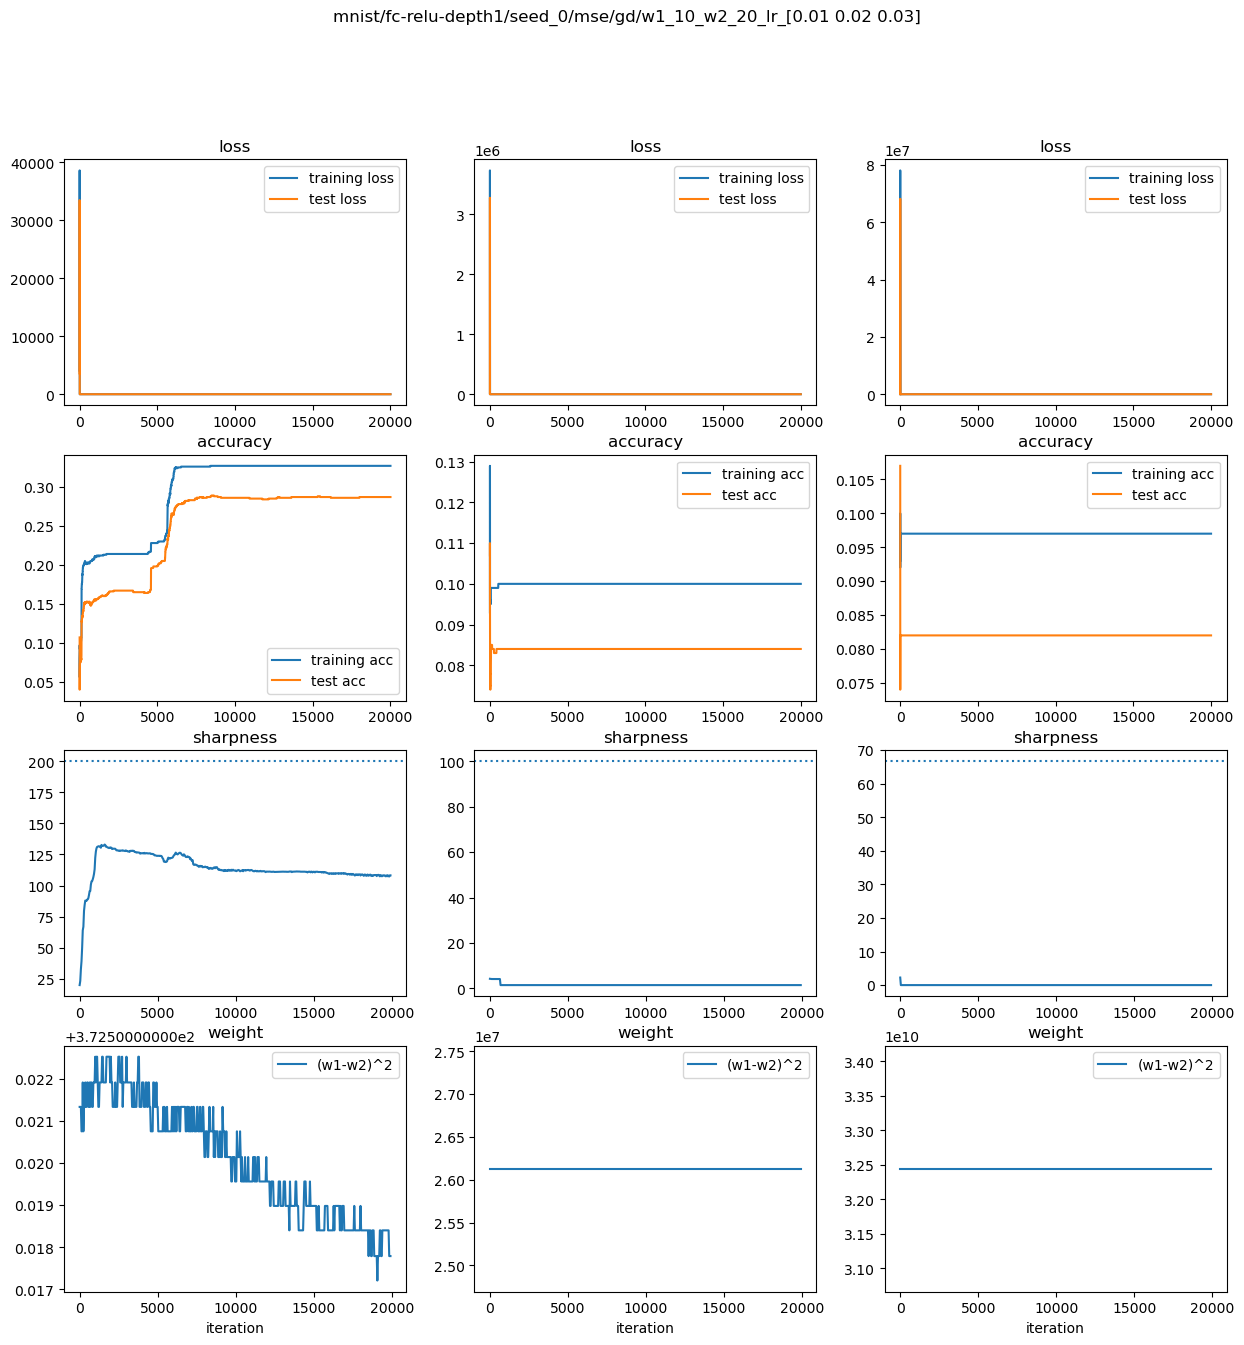

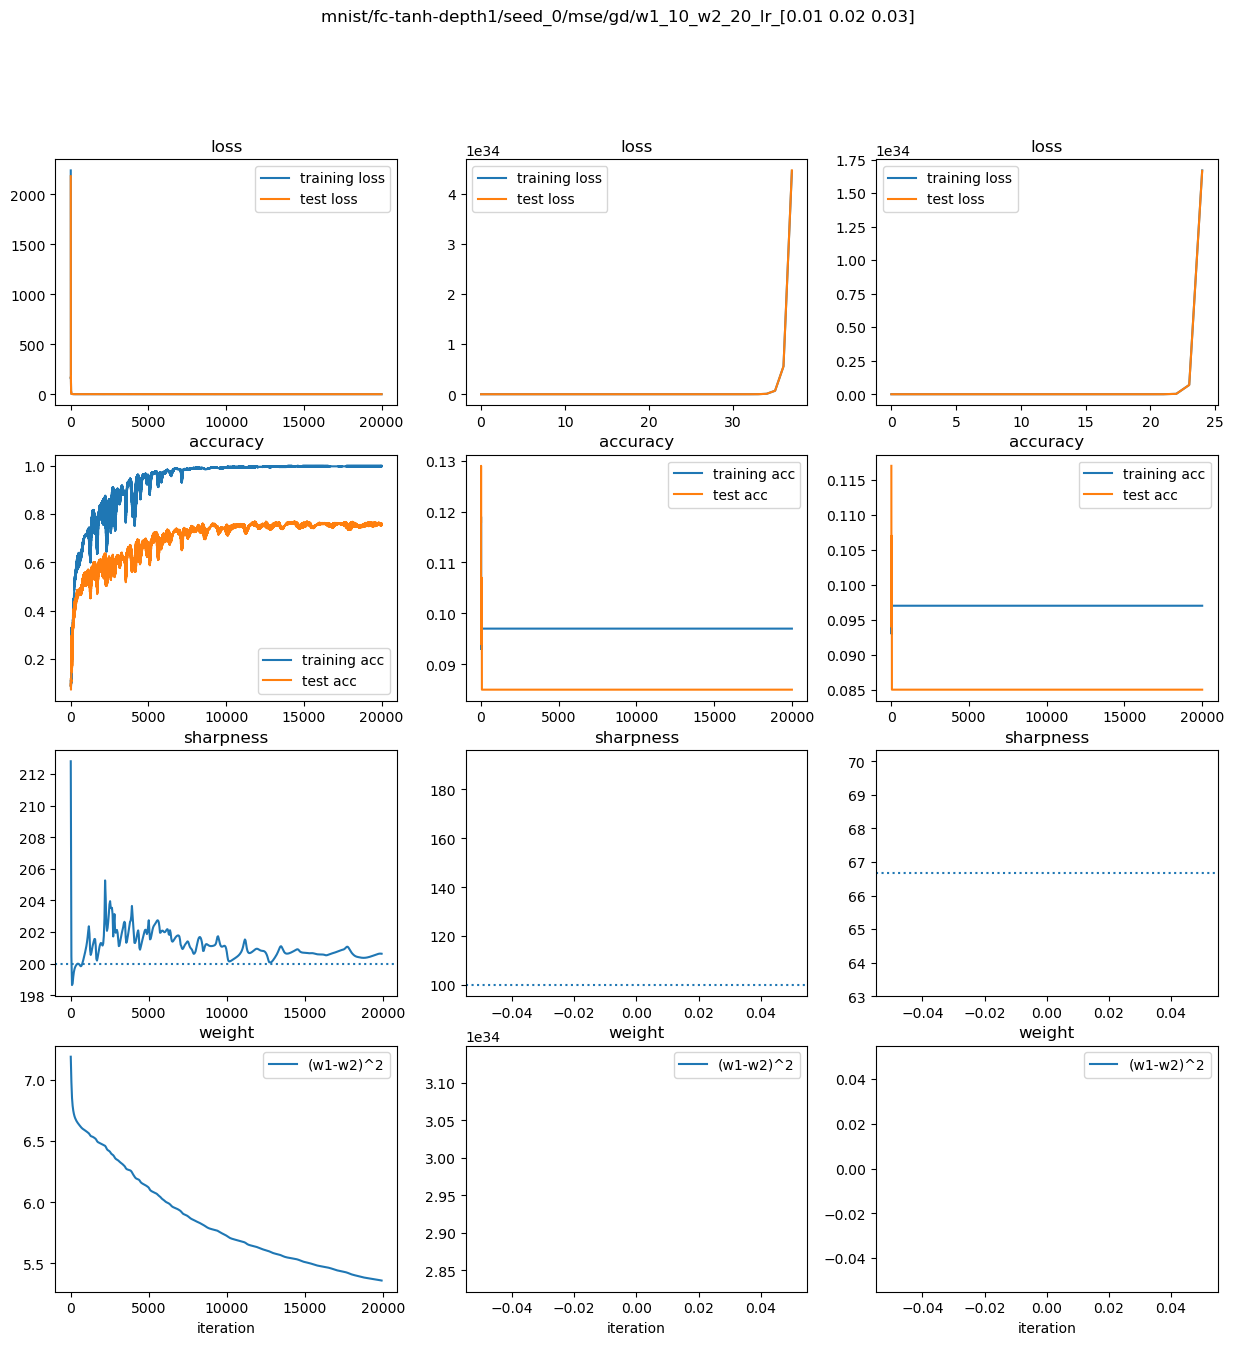

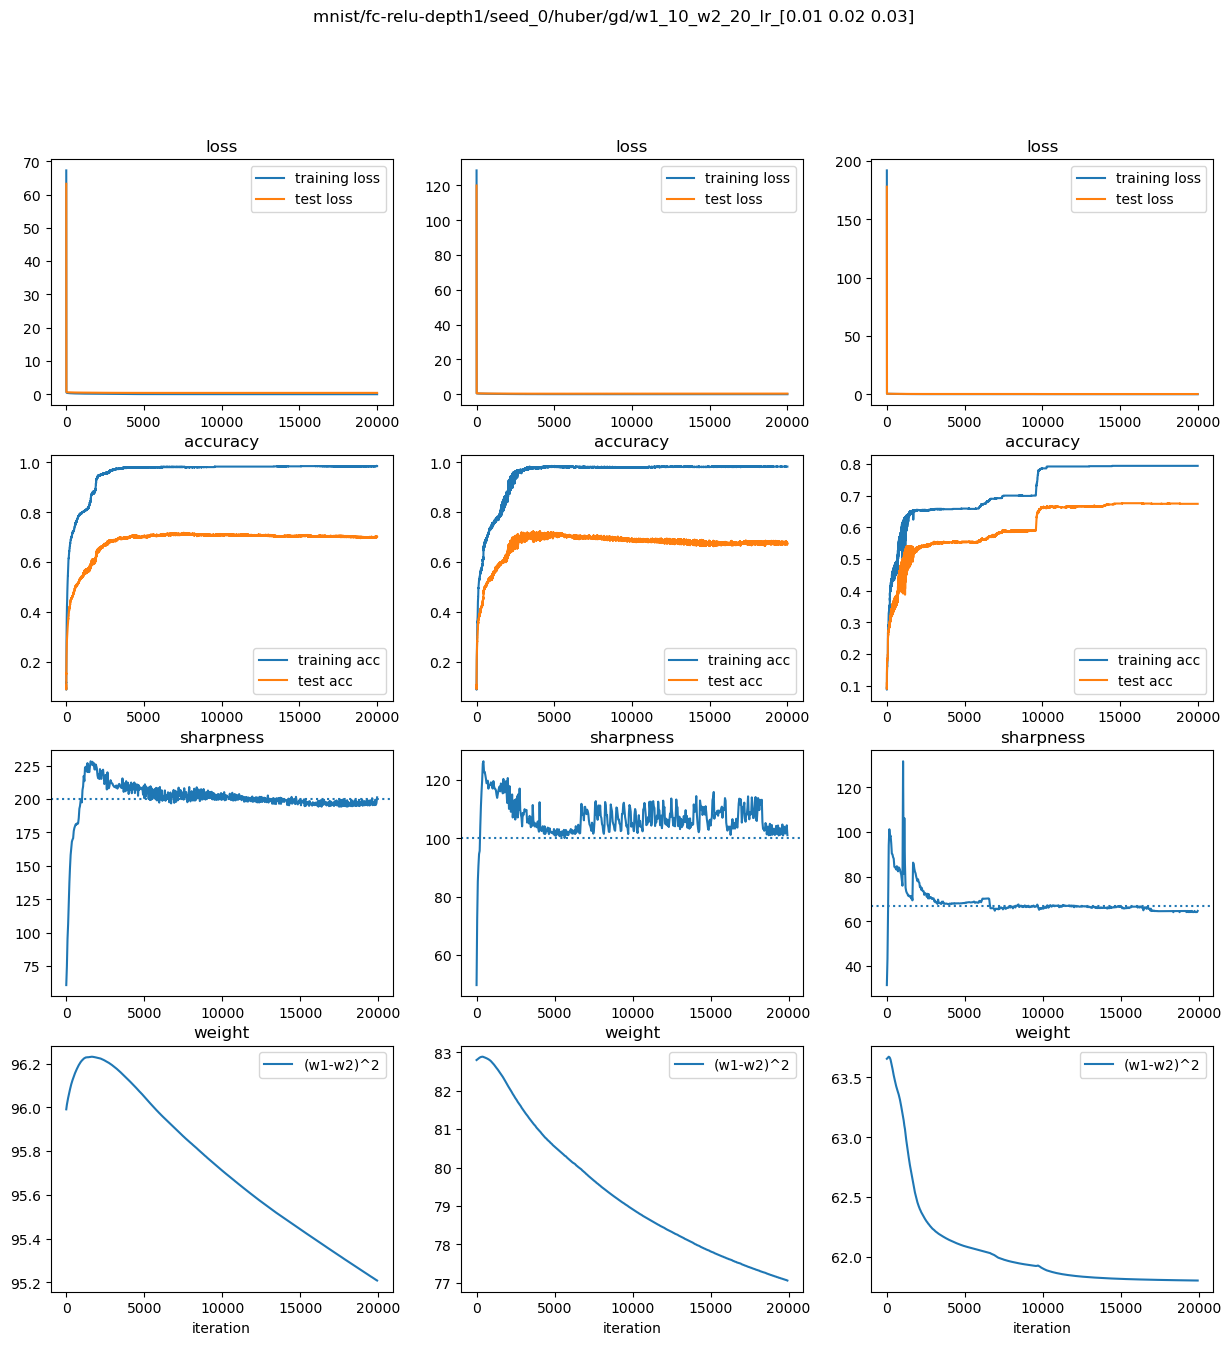

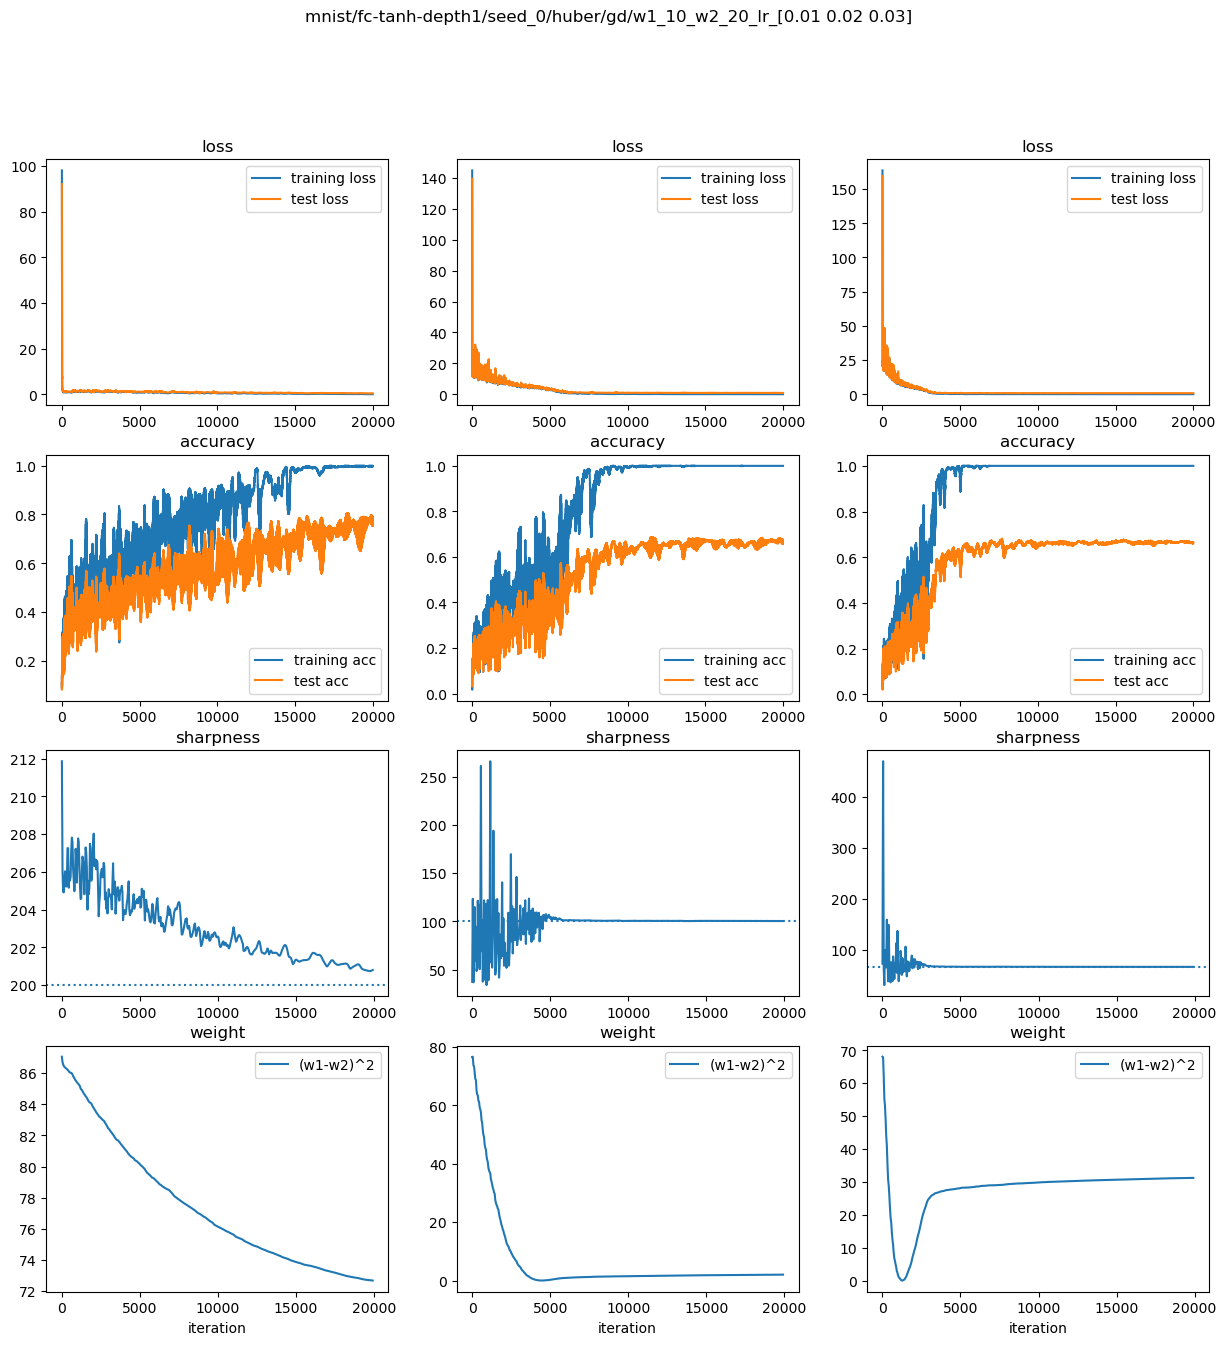

In [18]:
dataset = "mnist"
arch_list = ["fc-relu-depth1", "fc-tanh-depth1"]
# arch_list = ["fc-relu-depth1"]
arch_list = ["fc-relu-depth1"]
loss = "mse"
# lr_list = np.array([0.0001, 0.0002, 0.0004, 0.001, 0.002])
lr_list = np.array([0.0008])
# lr_list = np.array([0.01, 0.02, 0.04, 0.1, 0.2])
st = 0
# freq = [40] * 2 + [20] * 3
# freq = [40] * 4 + [400]
freq = [40] * 5
width = 200
bias = False
init_bias = "b_init"
init_weight = "w1_1_w2_1"
batch_norm = True
seed = 0

lr_list_mse_relu = {
    "w_init": [0.03, 0.05, 0.08],
    "w1_10_w2_2": [0.03, 0.05, 0.1], 

    "w1_10_w2_5": [0.01, 0.02, 0.03], 
    "w1_20_w2_5": [0.01, 0.02, 0.03], 
    "w1_20_w2_10": [0.01, 0.02, 0.03], 
    "w1_10_w2_10": [0.01, 0.02, 0.03], 
    "w1_10_w2_20": [0.01, 0.02, 0.03],

    }
lr_list_mse_tanh = {
    "w_init": [0.01, 0.02, 0.03], 
    "w1_10_w2_2": [0.01, 0.02, 0.03], 

    "w1_10_w2_5": [0.005, 0.01, 0.015], 
    "w1_20_w2_5": [0.005, 0.01, 0.015], 
    "w1_20_w2_10": [0.005, 0.01, 0.015], 
    "w1_10_w2_10": [0.01, 0.02, 0.03], 
    "w1_10_w2_20": [0.01, 0.02, 0.03],
}

lr_list_huber_relu = {
    "w_init": [0.03, 0.05, 0.08], 
    "w1_10_w2_2": [0.03, 0.05, 0.1], 

    "w1_10_w2_5": [0.03, 0.05, 0.08], 
    "w1_20_w2_5": [0.03, 0.05, 0.08], 
    "w1_20_w2_10": [0.03, 0.05, 0.08], 
    "w1_10_w2_10": [0.01, 0.02, 0.03], 
    "w1_10_w2_20": [0.01, 0.02, 0.03],
    
    }
lr_list_huber_tanh = {
    "w_init": [0.01, 0.03, 0.05], 
    "w1_10_w2_2": [0.01, 0.03, 0.05], 

    "w1_10_w2_5": [0.01, 0.02, 0.03], 
    "w1_20_w2_5": [0.01, 0.02, 0.03], 
    "w1_20_w2_10": [0.01, 0.02, 0.03], 
    "w1_10_w2_10": [0.01, 0.02, 0.03], 
    "w1_10_w2_20": [0.01, 0.02, 0.03],
    
}
lr_list_mse_relu_BN = {
    "w_init": [0.05, 0.06, 0.07], 
    "w1_10_w2_2": [0.05, 0.06, 0.07], 
    }

lr_list_mse_cubicrelu = {
    "w_init": [0.0004, 0.0006, 0.0008],
    "w1_10_w2_2": [0.0004, 0.0005, 0.0006, 0.0007, 0.0008],
    }

for weight in ["w1_10_w2_20"]:
    # for lr in lr_list_mse_relu_BN[weight]: 
    plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, False, lr_list_mse_relu[weight], st, freq, "linear", starting=1, seed=seed)
    plot_result(dataset, 'fc-tanh-depth1', 'mse', width, bias, init_bias, weight, False, lr_list_mse_tanh[weight], st, freq, "linear", starting=1, seed=seed)
    plot_result(dataset, 'fc-relu-depth1', 'huber', width, bias, init_bias, weight, False, lr_list_huber_relu[weight], st, freq, "linear", starting=1, seed=seed)
    plot_result(dataset, 'fc-tanh-depth1', 'huber', width, bias, init_bias, weight, False, lr_list_huber_tanh[weight], st, freq, "linear", starting=1, seed=seed)
    # plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, True, lr_list_mse_relu_BN[weight], st, freq, "linear", starting=0, seed=seed)
    # plot_result(dataset, 'fc-cubic_relu-depth1', 'huber', width, bias, init_bias, weight, False, lr_list_huber_cubicrelu_small[weight], st, freq, "linear", starting=0, seed=0)
    # plot_result(dataset, 'fc-cubic_relu-depth1', 'huber', width, bias, init_bias, weight, False, lr_list_huber_cubicrelu[weight], st, freq, "linear", starting=0)



4
4
4
4


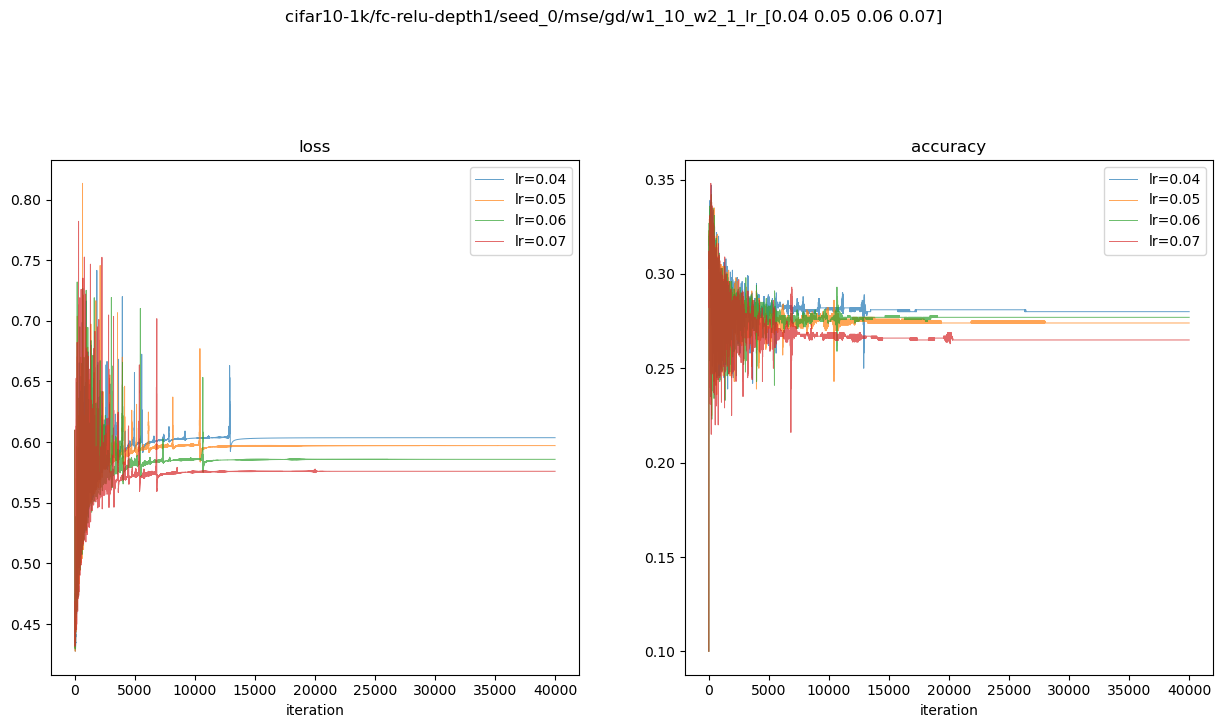

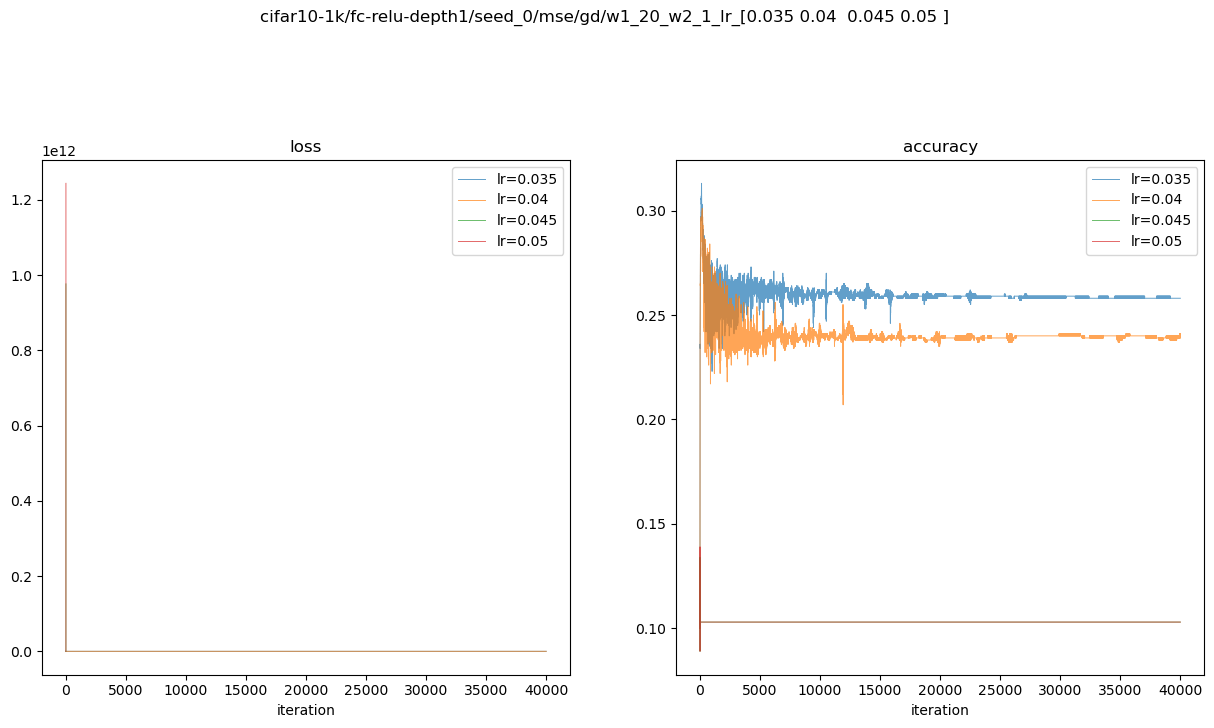

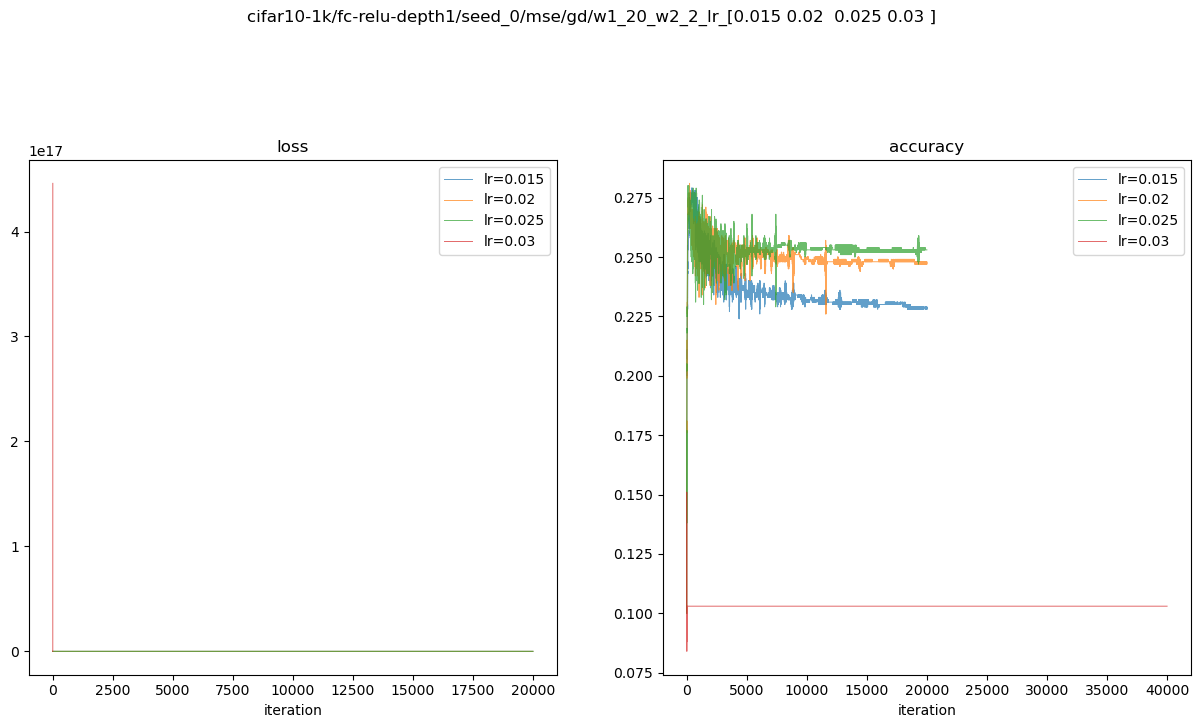

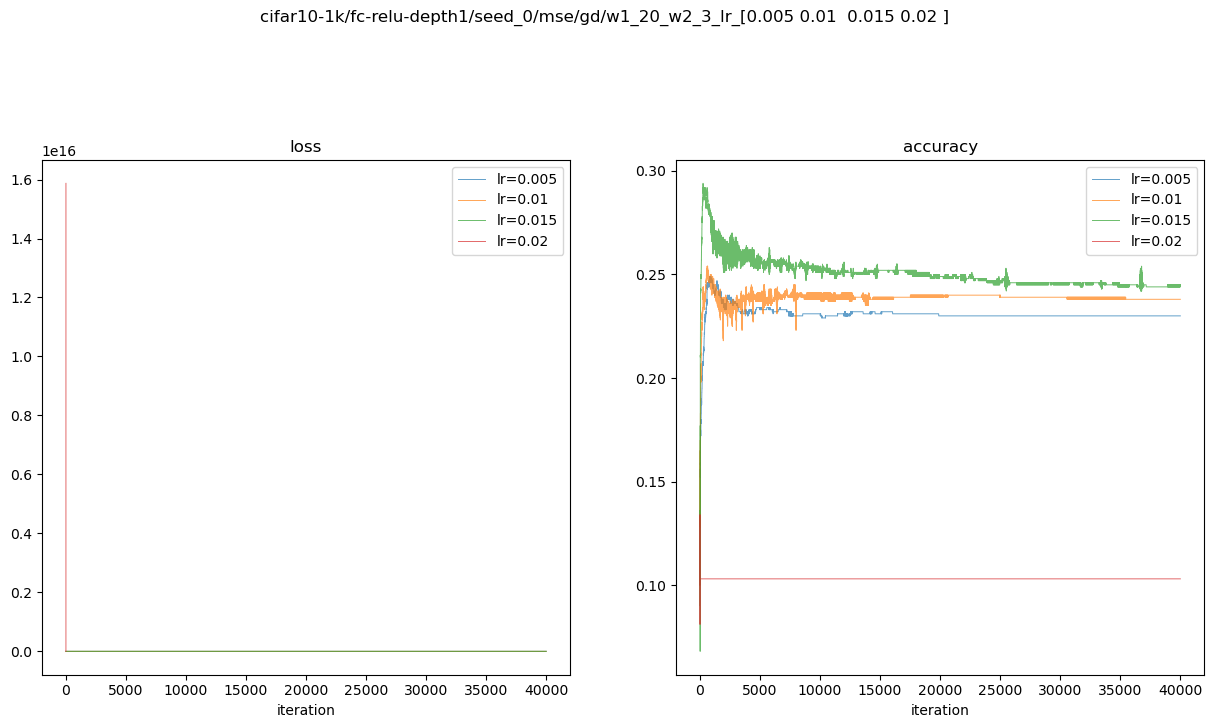

In [17]:
def plot_test(dataset, arch_id, loss, width, bias, init_bias, init_weight, batch_norm, lr_list, st=0, freq=10, scale="log", factor=10., starting=0, seed=0):
    lr_list = np.array(lr_list)
    lr_list = lr_list[st:st+5]
    lr_num = lr_list.shape[0]
    plt.figure(figsize=(15, 15), dpi=100)
    title = f"{dataset}/{arch_id}_BN/seed_{seed}/{loss}/gd/{init_weight}_lr_{lr_list}" if batch_norm else f"{dataset}/{arch_id}/seed_0/{loss}/gd/{init_weight}_lr_{lr_list}"
    plt.suptitle(title)
    print(lr_num)
    ax_loss = plt.subplot(221)
    ax_acc = plt.subplot(222)
    
    for i, lr in enumerate(lr_list):
    # for i, lr in enumerate(np.arange(0.1, 0.2, 0.02)):
        # gd_lr = 0.01
        gd_lr = lr
        gd_eig_freq = freq if isinstance(freq, int) else freq[i]

        # gd_directory = f"./results/{dataset}/{arch}/seed_0/{loss}/gd/lr_{gd_lr}"
        gd_directory = get_gd_directory(dataset, lr, arch_id, seed, "gd", loss, 0.0, width=width, bias=bias, init_bias=init_bias, init_weight=init_weight, batch_norm=batch_norm)

        gd_train_loss = torch.load(f"{gd_directory}/train_loss_final")[starting:]
        gd_train_acc = torch.load(f"{gd_directory}/train_acc_final")[starting:]
        gd_test_loss = torch.load(f"{gd_directory}/test_loss_final")[starting:]
        gd_test_acc = torch.load(f"{gd_directory}/test_acc_final")[starting:]
        gd_sharpness = torch.load(f"{gd_directory}/eigs_final")[:,0][starting:]
        gd_w1 = torch.load(f"{gd_directory}/w1_final")[starting:]
        gd_w2 = torch.load(f"{gd_directory}/w2_final")[starting:]

        # gd_steps = range(0, gd_sharpness.size(dim=0)*gd_eig_freq, gd_eig_freq)

        # plt.subplot(4, lr_num, lr_num*0+i+1)
        # plt.xlim(1, 20000)
        ax_loss.plot(gd_test_loss, label=f'lr={lr}', linewidth=0.7, alpha=0.7)
        ax_acc.plot(gd_test_acc, label=f'lr={lr}', linewidth=0.7, alpha=0.7)

        
    ax_loss.set_xlabel('iteration')
    ax_loss.set_title('loss')
    ax_acc.set_xlabel('iteration')
    ax_acc.set_title('accuracy')
    ax_loss.legend()
    ax_acc.legend()
    title = title.replace('/', '_')
    # plt.savefig(f'results/0821/{title}.png')
    
dataset = "cifar10-1k"
arch_list = ["fc-relu-depth1", "fc-tanh-depth1"]
# arch_list = ["fc-relu-depth1"]
arch_list = ["fc-relu-depth1"]
loss = "mse"
# lr_list = np.array([0.0001, 0.0002, 0.0004, 0.001, 0.002])
lr_list = np.array([0.0008])
# lr_list = np.array([0.01, 0.02, 0.04, 0.1, 0.2])
st = 0
# freq = [40] * 2 + [20] * 3
# freq = [40] * 4 + [400]
freq = [40] * 5
width = 200
bias = False
init_bias = "b_init"
init_weight = "w1_1_w2_1"
batch_norm = True


lr_list_mse_relu = {
    "w1_1_w2_1": [0.07, 0.08, 0.09], 
    "w1_1_w2_2": [0.02, 0.025, 0.03], 
    "w1_1_w2_5": [0.003, 0.0035, 0.004], 
    "w1_1_w2_10": [0.0008, 0.001, 0.0012] 
    }
lr_list_mse_tanh = {
    "w1_1_w2_1": [0.01, 0.03, 0.05], 
    "w1_1_w2_2": [0.01, 0.015, 0.02], 
    "w1_1_w2_5": [0.01, 0.015, 0.02], 
    "w1_1_w2_10": [0.01, 0.015, 0.02]
}

lr_list_huber_relu = {
    "w1_1_w2_1": [0.07, 0.08, 0.09], 
    "w1_1_w2_2": [0.02, 0.03, 0.04], 
    "w1_1_w2_5": [0.02, 0.03, 0.04], 
    "w1_1_w2_10": [0.02, 0.03, 0.04] 
    }
lr_list_huber_tanh = {
    "w1_1_w2_1": [0.01, 0.03, 0.05], 
    "w1_1_w2_2": [0.01, 0.015, 0.02], 
    "w1_1_w2_5": [0.01, 0.015, 0.02], 
    "w1_1_w2_10": [0.01, 0.015, 0.02]
}

lr_list_mse_relu_BN = {
    "w1_1_w2_1": [0.02, 0.03, 0.04], 
    "w1_1_w2_2": [0.02, 0.03, 0.04], 
    "w1_1_w2_5": [0.02, 0.03, 0.04], 
    "w1_1_w2_10": [0.02, 0.03, 0.04] 
    }
lr_list_ce_relu = {
    "w1_1_w2_1": [0.1, 0.15, 0.2], 
    "w1_1_w2_2": [0.1, 0.15, 0.2], 
    "w1_1_w2_5": [0.02, 0.05, 0.1], 
    "w1_1_w2_10": [0.02, 0.05, 0.1] 
    }
lr_list_mse_cubicrelu = {
    "w1_1_w2_1": [0.01, 0.015, 0.02], 
    "w1_1_w2_2": [0.01, 0.015, 0.02], 
    "w1_1_w2_5": [0.005, 0.08, 0.01], 
    "w1_1_w2_10": [0.0002, 0.005, 0.008], 
    "w1_10_w2_1": [0.002, 0.0025, 0.003, 0.0035, 0.0036], 
    "w1_10_w2_2": [0.0004, 0.0005, 0.0006, 0.0007, 0.0008]  
    }
# for weight in ["w1_1_w2_1", "w1_1_w2_2", "w1_1_w2_5", "w1_1_w2_10"]:
lr_list_huber_cubicrelu = {
    "w1_10_w2_2": [0.0015, 0.002, 0.0023] 
    }

lr_list_mse_tanh_small = {
    "w_init": [0.005, 0.006, 0.007], 
    "w1_1_w2_5": [0.0006, 0.0007, 0.00075], 
    "w1_1_w2_10": [0.0003, 0.0005, 0.0008]
}

lr_list_huber_relu_small = {
    "w_init": [0.005, 0.01, 0.015], 
    "w1_1_w2_5": [0.001, 0.002, 0.0025], 
    "w1_1_w2_10": [0.001, 0.003, 0.005] 
    }
lr_list_huber_tanh_small = {
    "w_init": [0.005, 0.006, 0.007], 
    "w1_1_w2_5": [0.0006, 0.0007, 0.00075], 
    "w1_1_w2_10": [0.0003, 0.0005, 0.0008]
}
lr_list_mse_relu_BN_small = {
    "w_init": [0.004, 0.005, 0.006, 0.007, 0.008],
    }
lr_list_huber_cubicrelu_small = {
    "w_init": [0.001, 0.0015, 0.002, 0.0025, 0.003],
    "w1_10_w2_2": [0.0015, 0.002, 0.0023],
    "w1_10_w2_5": [0.0010, 0.0015, 0.0020], 
    "w1_20_w2_2": [0.0005, 0.0010, 0.0015, 0.0020], 
    "w1_20_w2_5": [0.0005, 0.0010, 0.0015, 0.0020] 
    }
lr_list_mse_relu_small = {
    "w_init": [0.02, 0.025, 0.028, 0.03], 
    "w1_10_w2_1": [0.04, 0.05, 0.06, 0.07], 
    "w1_20_w2_1": [0.035, 0.04, 0.045, 0.05], 
    "w1_20_w2_2": [0.015, 0.02, 0.025, 0.03], 
    "w1_20_w2_3": [0.005, 0.01, 0.015, 0.02], 
    }
    
for weight in ["w1_10_w2_1", "w1_20_w2_1", "w1_20_w2_2", "w1_20_w2_3"]:
    # plot_test(dataset, 'fc-tanh-depth1', 'mse', width, bias, init_bias, weight, False, lr_list_mse_tanh_small[weight], st, freq, "linear", starting=0)
    # plot_test(dataset, 'fc-relu-depth1', 'huber', width, bias, init_bias, weight, False, lr_list_huber_relu_small[weight], st, freq, "linear", starting=0)
    # plot_test(dataset, 'fc-tanh-depth1', 'huber', width, bias, init_bias, weight, False, lr_list_huber_tanh_small[weight], st, freq, "linear", starting=0)
    # plot_test(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, True, lr_list_mse_relu_BN_small[weight], st, freq, "linear", starting=0)
    plot_test(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, False, lr_list_mse_relu_small[weight], st, freq, "linear", starting=0)

3
tensor(75.9281) tensor(10.0000) tensor(2.0000)
tensor(75.9281) tensor(10.0000) tensor(2.0000)
tensor(75.9281) tensor(10.0000) tensor(2.0000)
3
tensor(91.2291) tensor(10.0000) tensor(2.0000)
tensor(91.2291) tensor(10.0000) tensor(2.0000)
tensor(91.2291) tensor(10.0000) tensor(2.0000)
3
tensor(74.3295) tensor(10.0000) tensor(2.0000)
tensor(74.3295) tensor(10.0000) tensor(2.0000)
tensor(74.3295) tensor(10.0000) tensor(2.0000)
3
tensor(87.3042) tensor(10.0000) tensor(2.0000)
tensor(87.3042) tensor(10.0000) tensor(2.0000)
tensor(87.3042) tensor(10.0000) tensor(2.0000)
3


FileNotFoundError: [Errno 2] No such file or directory: './results//mnist/fc-relu-depth1_BN/seed_1/mse/gd/width_200_w1_10_w2_2_nobias/lr_0.05/train_loss_final'

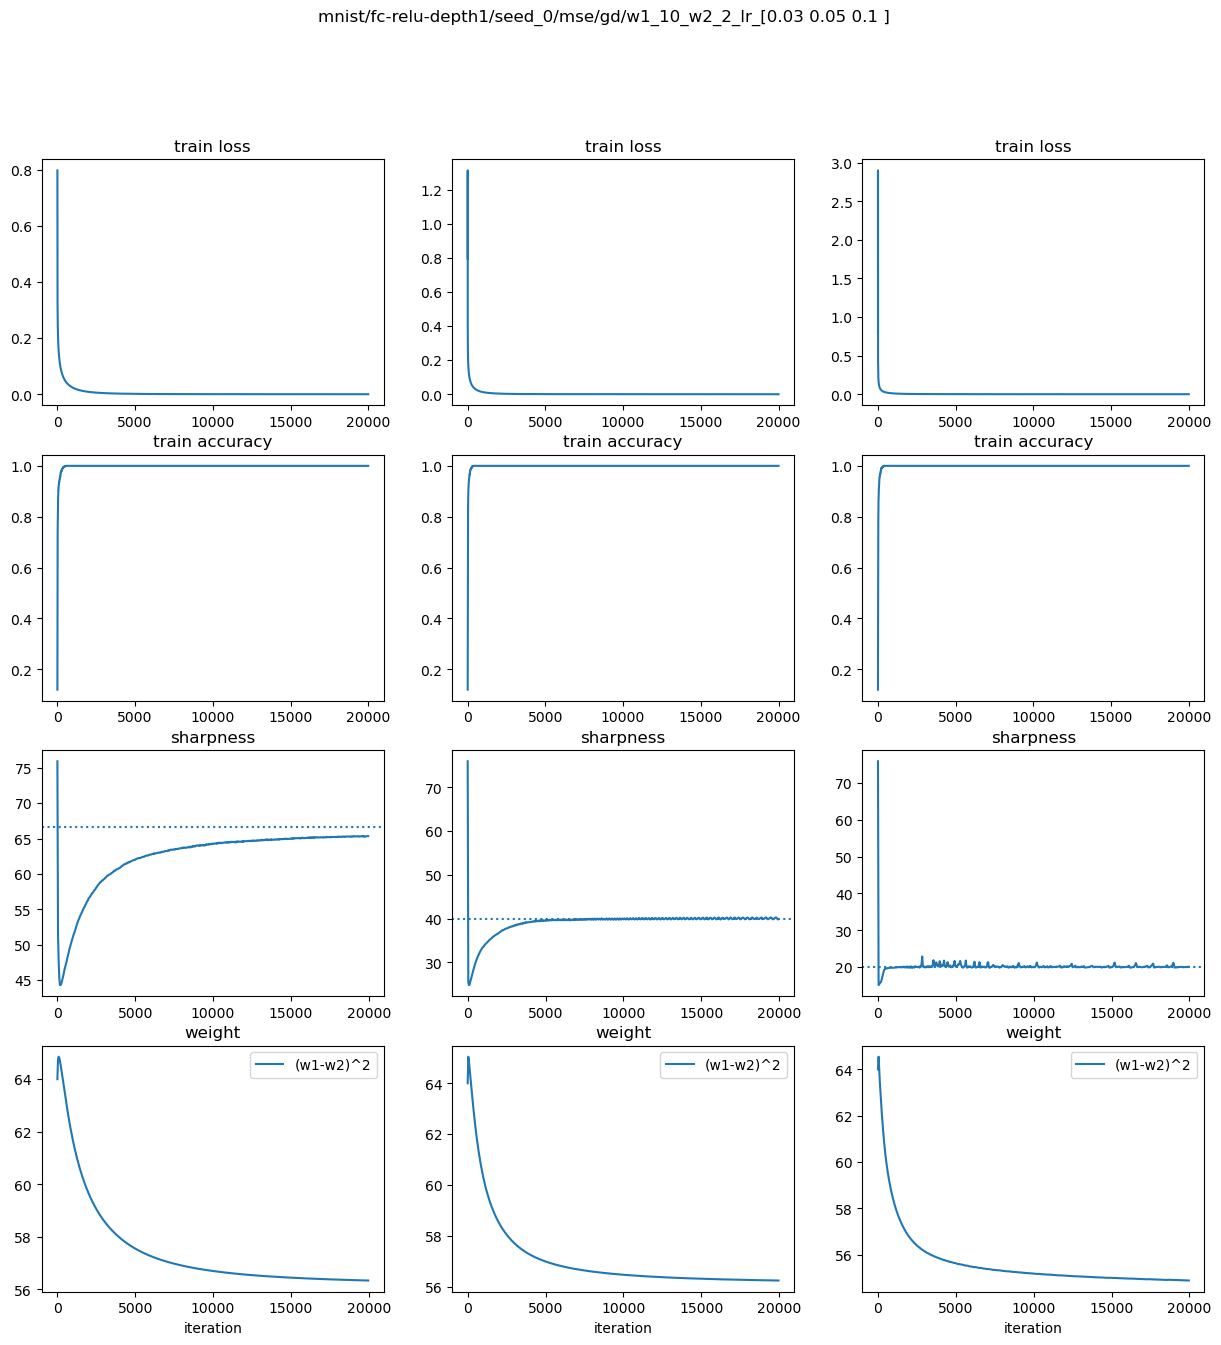

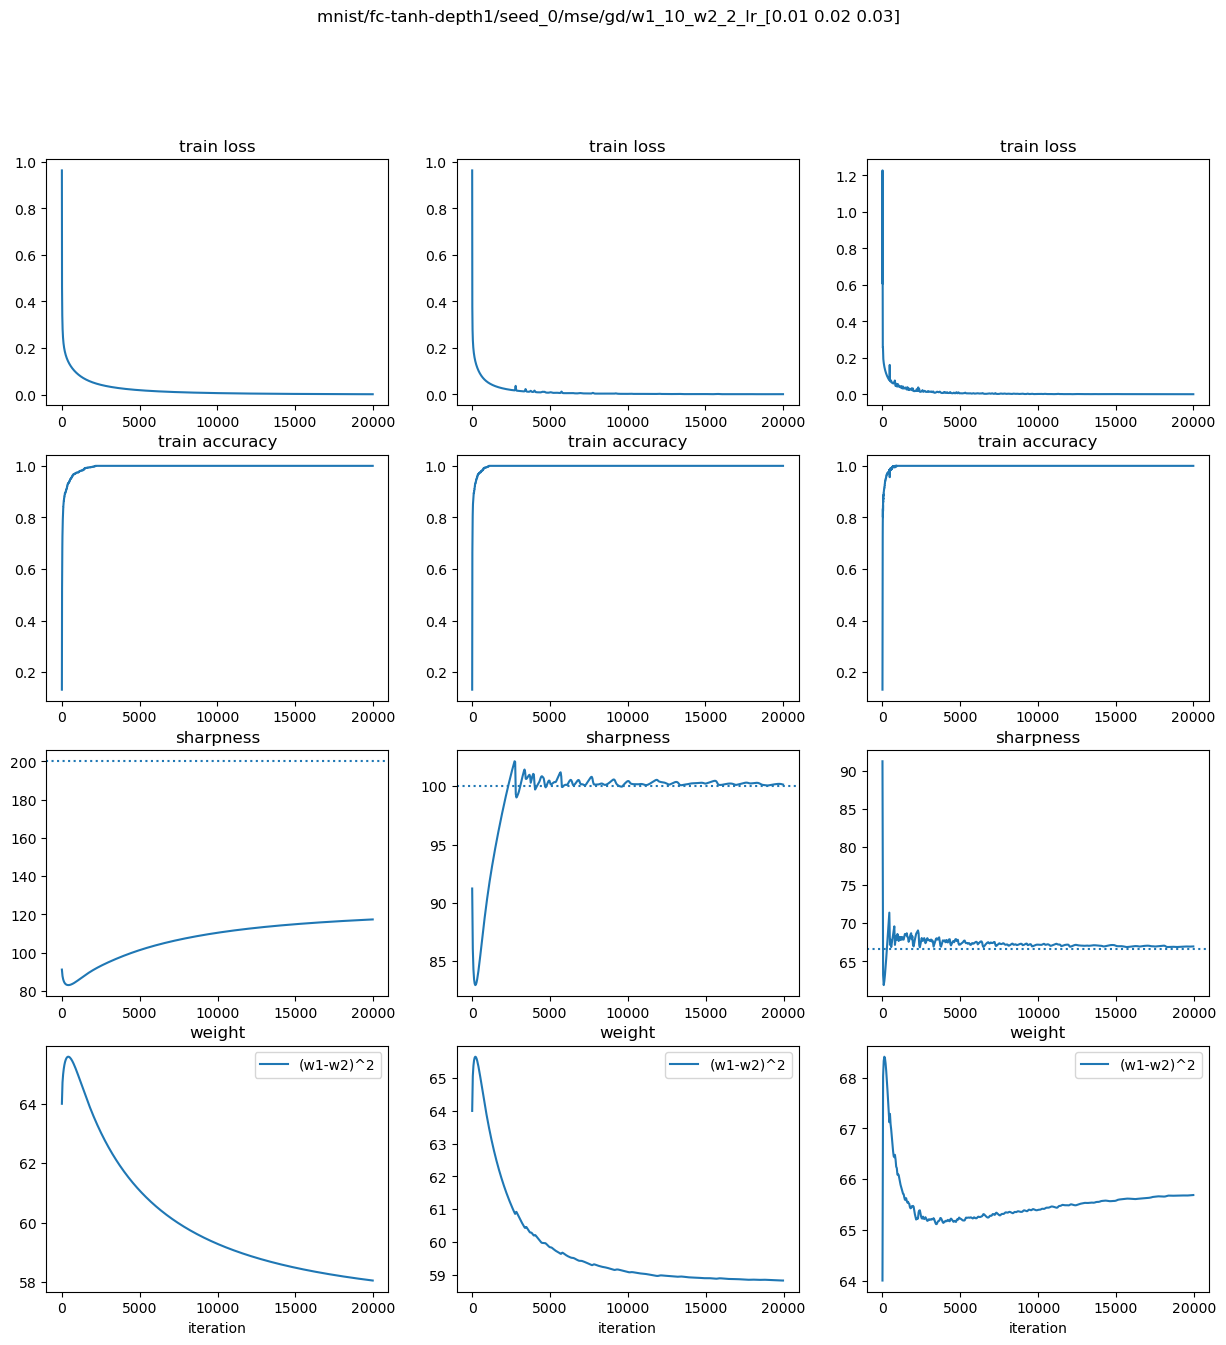

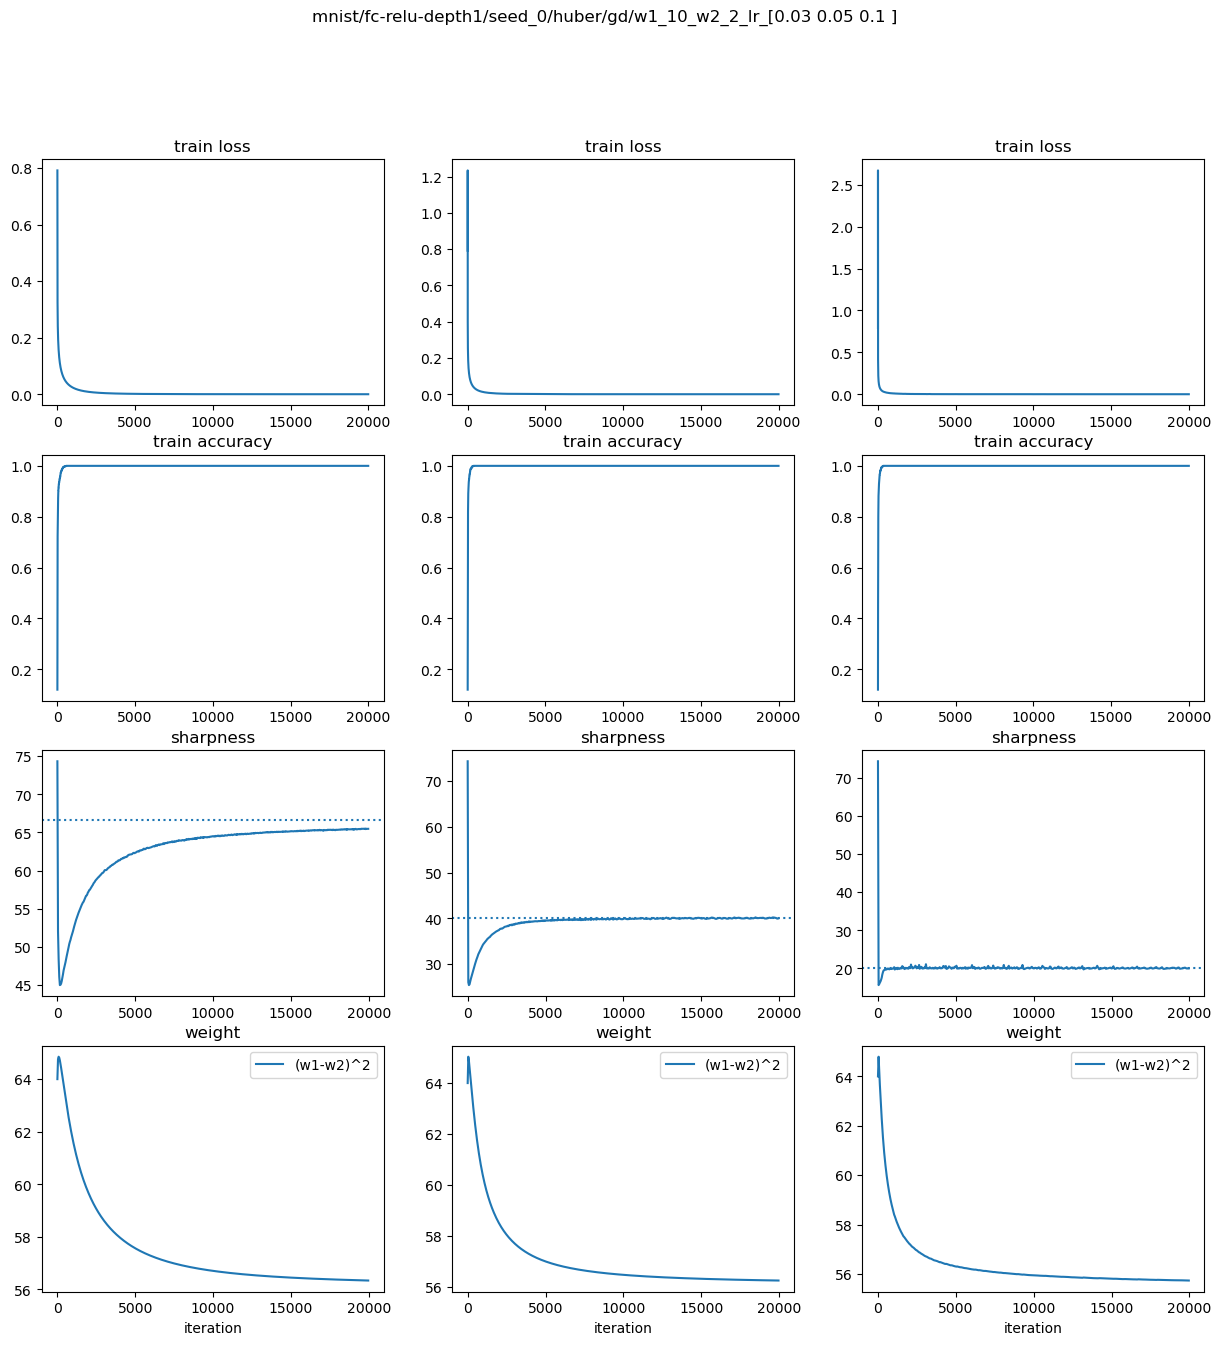

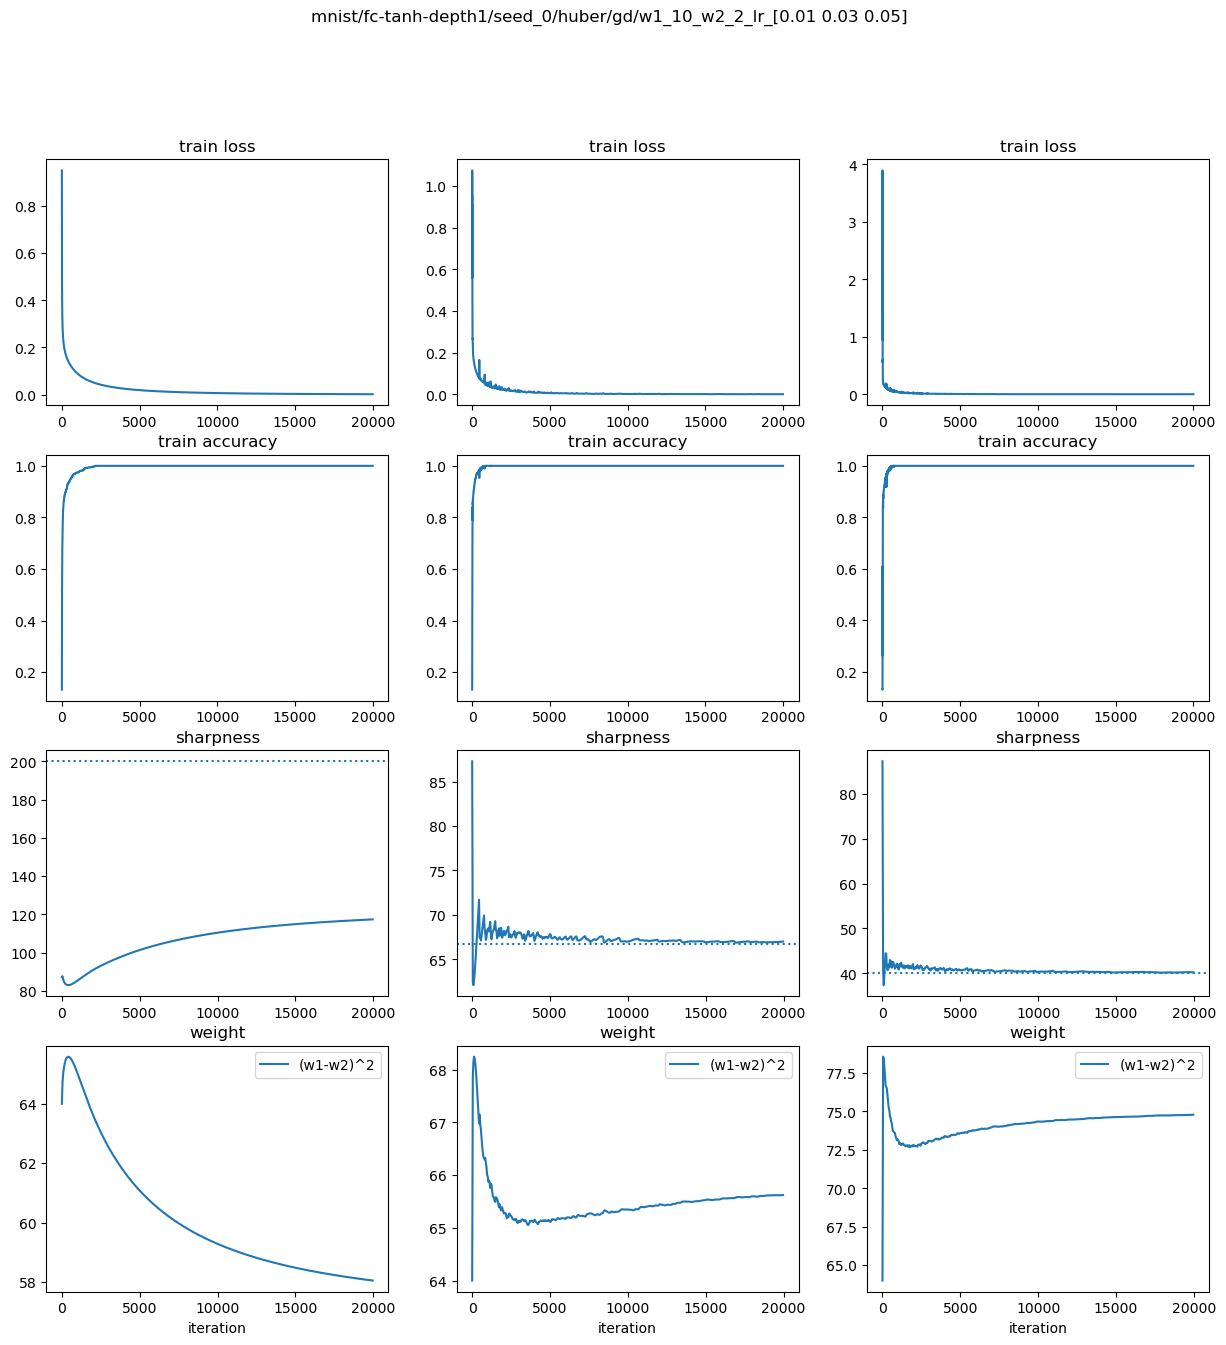

<Figure size 1500x1500 with 0 Axes>

In [55]:
dataset = 'mnist'
lr_list_mse_relu = {
    "w1_10_w2_2": [0.03, 0.05, 0.1], 
    }
lr_list_mse_tanh = {
    "w1_10_w2_2": [0.01, 0.02, 0.03], 
}

lr_list_huber_relu = {
    "w1_10_w2_2": [0.03, 0.05, 0.1], 
    }
lr_list_huber_tanh = {
    "w1_10_w2_2": [0.01, 0.03, 0.05], 
}

lr_list_mse_relu_BN = {
    "w1_10_w2_2": [0.05, 0.06, 0.07], 
    }

lr_list_mse_cubicrelu = {
    "w1_10_w2_2": [0.0004, 0.0005, 0.0006, 0.0007, 0.0008] 
    }
for weight in ["w1_10_w2_2"]:
    # for lr in lr_list_mse_relu_BN[weight]: 
    plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, False, lr_list_mse_relu[weight], st, freq, "linear", starting=0)
    plot_result(dataset, 'fc-tanh-depth1', 'mse', width, bias, init_bias, weight, False, lr_list_mse_tanh[weight], st, freq, "linear", starting=0)
    plot_result(dataset, 'fc-relu-depth1', 'huber', width, bias, init_bias, weight, False, lr_list_huber_relu[weight], st, freq, "linear", starting=0)
    plot_result(dataset, 'fc-tanh-depth1', 'huber', width, bias, init_bias, weight, False, lr_list_huber_tanh[weight], st, freq, "linear", starting=0)
    plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, True, lr_list_mse_relu_BN[weight], st, freq, "linear", starting=0)
    # plot_result(dataset, 'fc-cubic_relu-depth1', 'mse', width, bias, init_bias, weight, False, lr_list, st, freq, "log", starting=0)